----------------------------------Ablauf der Gesichtserkennung-----------------------------------------------------------------------------------------------------------------


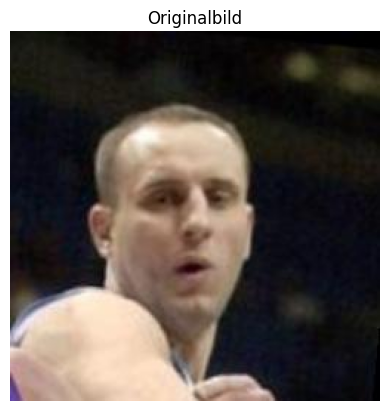

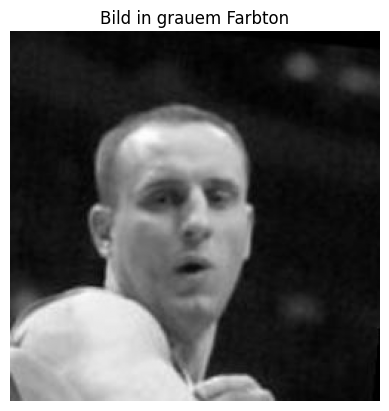

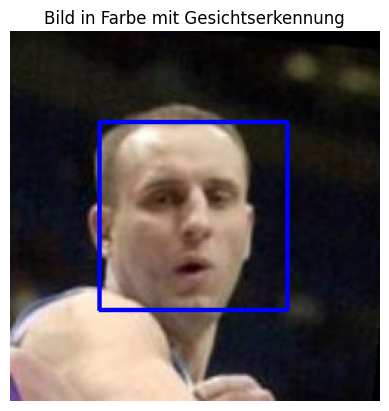

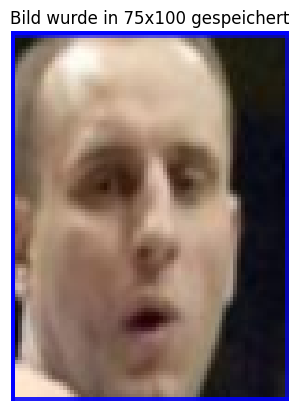

------------------------------------------ Endresultat:10 Zufallsbilder in 75x100----------------------------------------------------------------------------------------------


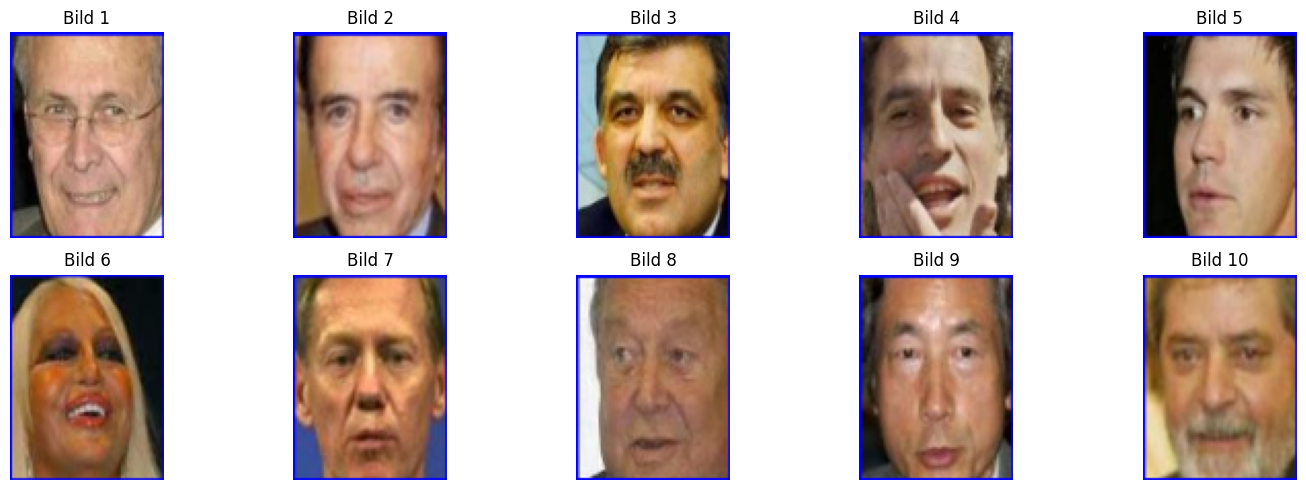

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

📊 Zusammenfassende Auswertung:
Anzahl der Gesichter insgesamt im Datensatz = 13233
Anzahl der erkannten Bilder = 12322
Erkennungsrate in % = 93.11569560946118


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random


# 1. Classifier laden
face_cascade = cv2.CascadeClassifier(r"C:\Users\goex1\Desktop\1 Weiterbildung Data Science\Abschlussprojekt\Abschlussarbeit\haarcascade_frontalface_default.xml")

# 2. Ordner durchlaufen, Bildpfad erstellen, Zähler erstellen und Bilder laden
relevanter_Ordner = r"C:\Users\goex1\Desktop\1 Weiterbildung Data Science\Abschlussprojekt\LFW Daten\lfw-deepfunneled\lfw-deepfunneled"

gespeicherte_Dateinamen=[]
gespeicherte_Gesichter=[]
anzahl_bilder_mit_einem_gesicht = 0

for root, dirs, bilder in os.walk(relevanter_Ordner):
    for bild_name in bilder:
        bildpfad = os.path.join(root, bild_name)
        originalbild = cv2.imread(bildpfad)
        
        3.#Bildbearbeitung durchführen
        if originalbild is not None:
            # Von BGR-> In RGB und Graustufen konvertieren
            bild_rgb = cv2.cvtColor(originalbild, cv2.COLOR_BGR2RGB)
            bild_grau = cv2.cvtColor(bild_rgb, cv2.COLOR_RGB2GRAY)

            # 4. Gesichtserkennung
            faces = face_cascade.detectMultiScale(bild_grau, scaleFactor=1.3, minNeighbors=4)

            if len(faces) != 1:
                continue 
            anzahl_bilder_mit_einem_gesicht += 1

            for (x, y, w, h) in faces:
                
                # Region of Interest definieren
                roi_gray = bild_grau[y:y + h, x:x + w]
                roi_color = bild_rgb[y:y + h, x:x + w]

                # Gesicht markieren
                gesicht=cv2.rectangle(bild_rgb, (x, y), (x + w, y + h), (0, 0, 255), 2)

                #5. Gesicht ausschneiden und in 75x100 speichern
                #Gesicht in 75x100 ausschneiden und speichern
                gesicht_klein = cv2.resize(roi_color, (75, 100))
                    
                # 6. gespeicherte Dateinamen und gespeicherte Gesichter in zwei verschiedenen Listen speichern
                gespeicherte_Dateinamen.append(bild_name)
                gespeicherte_Gesichter.append(gesicht_klein)





#7.Gespeicherte Dateinamen und gespeicherte Gesichter in numpy arrays umwandeln
gespeicherte_Dateinamen_np_array= np.array(gespeicherte_Dateinamen)
gespeicherte_Gesichter_np_array= np.array(gespeicherte_Gesichter)
        
#8.Arrays in .npy speichern
np.save("gespeicherte_Dateinamen_LFW.npy", gespeicherte_Dateinamen_np_array)
np.save("gespeicherte_Gesichter_LFW.npy", gespeicherte_Gesichter_np_array)

print("----------------------------------Ablauf der Gesichtserkennung-----------------------------------------------------------------------------------------------------------------")

# Bild in Farbe mit Gesichtserkennung
plt.imshow(cv2.cvtColor(originalbild,cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")
plt.show()


#Bild in grau#
plt.imshow(bild_grau, cmap="grey")
plt.title("Bild in grauem Farbton")
plt.axis("off")
plt.show()

#Bild in Farbe mit Gesichtserkennung#
plt.imshow(bild_rgb)
plt.title("Bild in Farbe mit Gesichtserkennung")
plt.axis("off")
plt.show()


#Bild in 75x100 mit Gesichtserkennung#
plt.imshow(gesicht_klein, interpolation='nearest')
plt.title("Bild wurde in 75x100 gespeichert")
plt.axis("off")
plt.show()


print("------------------------------------------ Endresultat:10 Zufallsbilder in 75x100----------------------------------------------------------------------------------------------")
import matplotlib.pyplot as plt
import random

# Zufällig 10 Bilder auswählen
zufallsbilder = random.sample((gespeicherte_Gesichter), 10)

# Anzeigen
plt.figure(figsize=(15, 5))
for i, bild in enumerate(zufallsbilder):
    plt.subplot(2, 5, i + 1)
    plt.imshow(bild)
    plt.axis("off")
    plt.title(f"Bild {i+1}")
plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")


print("\n📊 Zusammenfassende Auswertung:")
print("Anzahl der Gesichter insgesamt im Datensatz =", 13233)
print("Anzahl der erkannten Bilder =", anzahl_bilder_mit_einem_gesicht)
print("Erkennungsrate in % =", (anzahl_bilder_mit_einem_gesicht/13233)*100)
